In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [9]:
df = pd.read_csv(r"C:\Users\aleim\OneDrive\Documentos\UNAD\Primer semestre 2025\Analisis de Datos\Tarea 3\Dataset Arboles de Desicion\winequality-red.csv")

In [11]:
print(df.shape)
print(df.info())
print(df.describe())

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000 

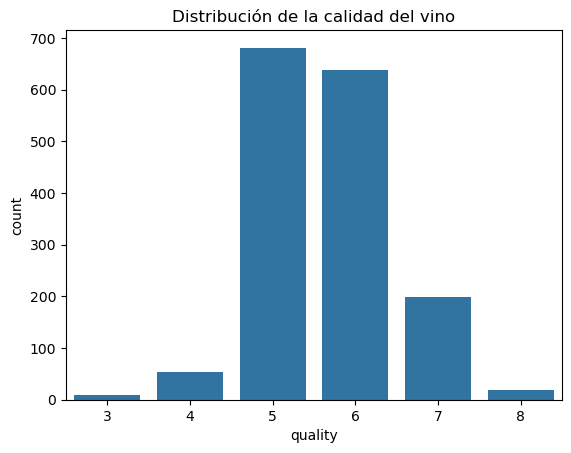

In [13]:
sns.countplot(x='quality', data=df)
plt.title('Distribución de la calidad del vino')
plt.show()

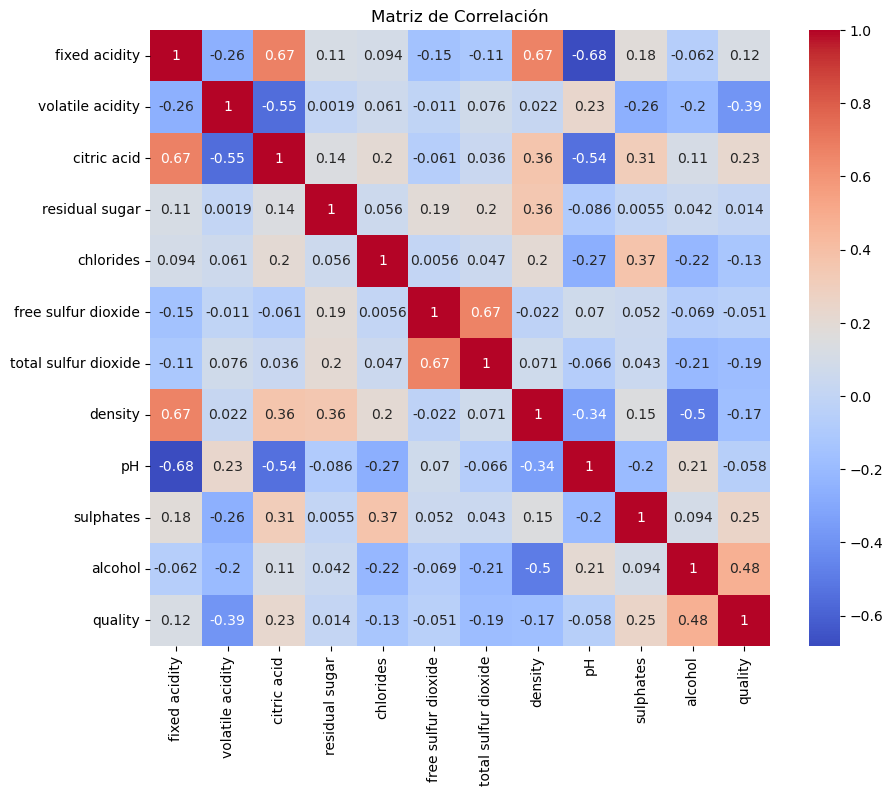

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

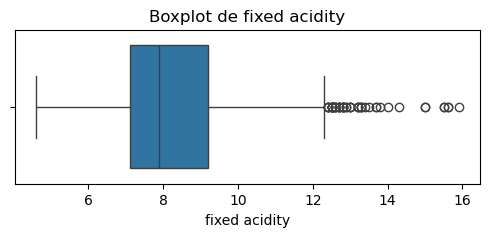

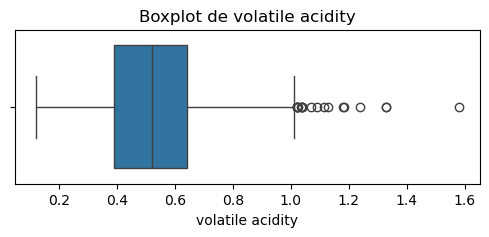

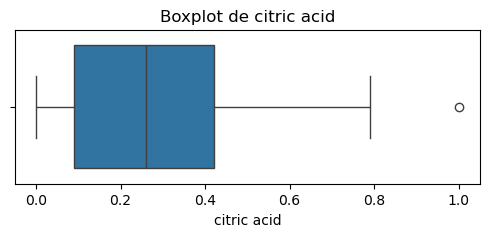

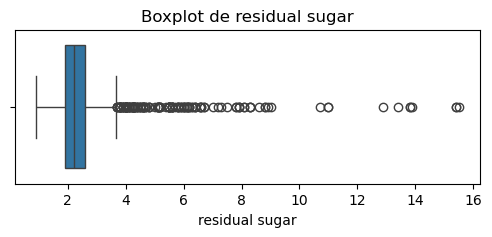

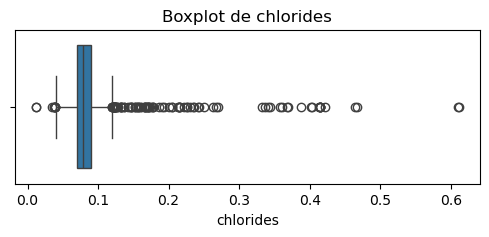

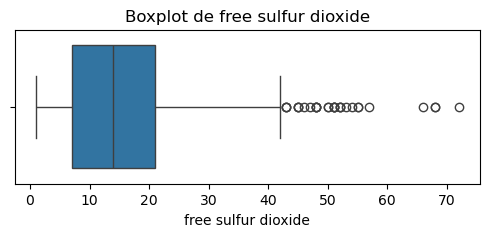

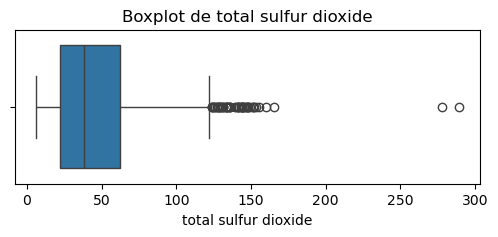

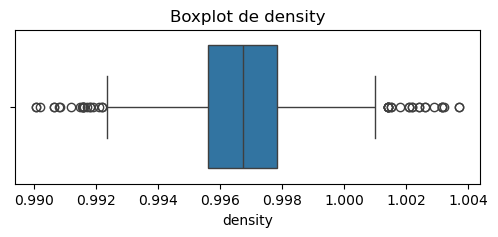

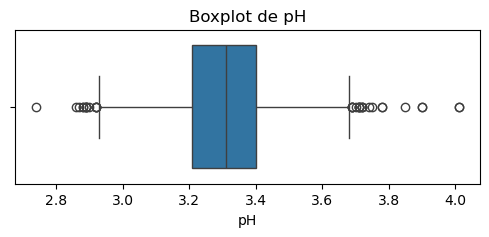

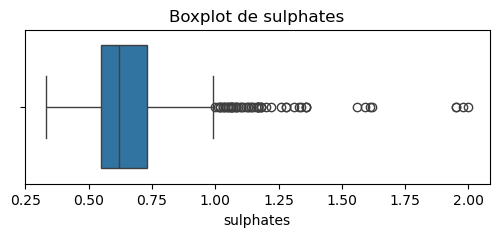

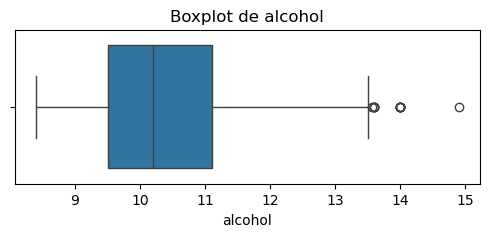

In [17]:
for column in df.columns[:-1]:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot de {column}')
    plt.show()

In [19]:
print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [21]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.drop('quality', axis=1, inplace=True)

In [25]:
X = df.drop('quality_binary', axis=1)
y = df['quality_binary']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", list(selected_features))

Características seleccionadas: ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [29]:
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
y_pred = modelo_arbol.predict(X_test)
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Precisión (accuracy):", accuracy_score(y_test, y_pred))

Matriz de Confusión:
 [[261  12]
 [ 35  12]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       273
           1       0.50      0.26      0.34        47

    accuracy                           0.85       320
   macro avg       0.69      0.61      0.63       320
weighted avg       0.83      0.85      0.83       320

Precisión (accuracy): 0.853125


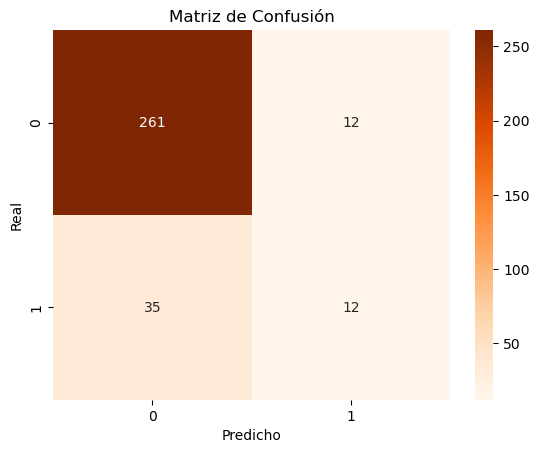

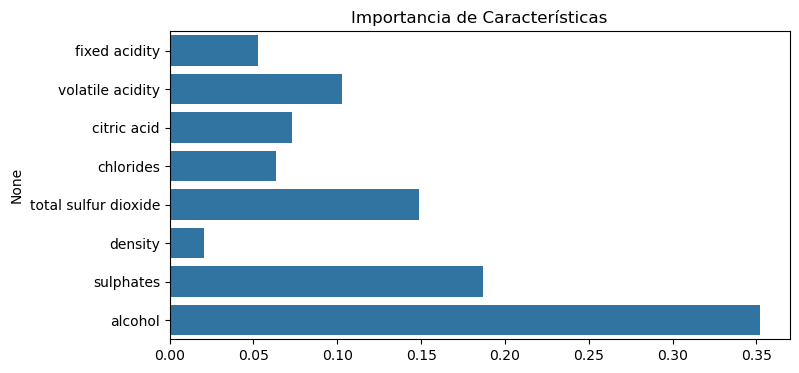

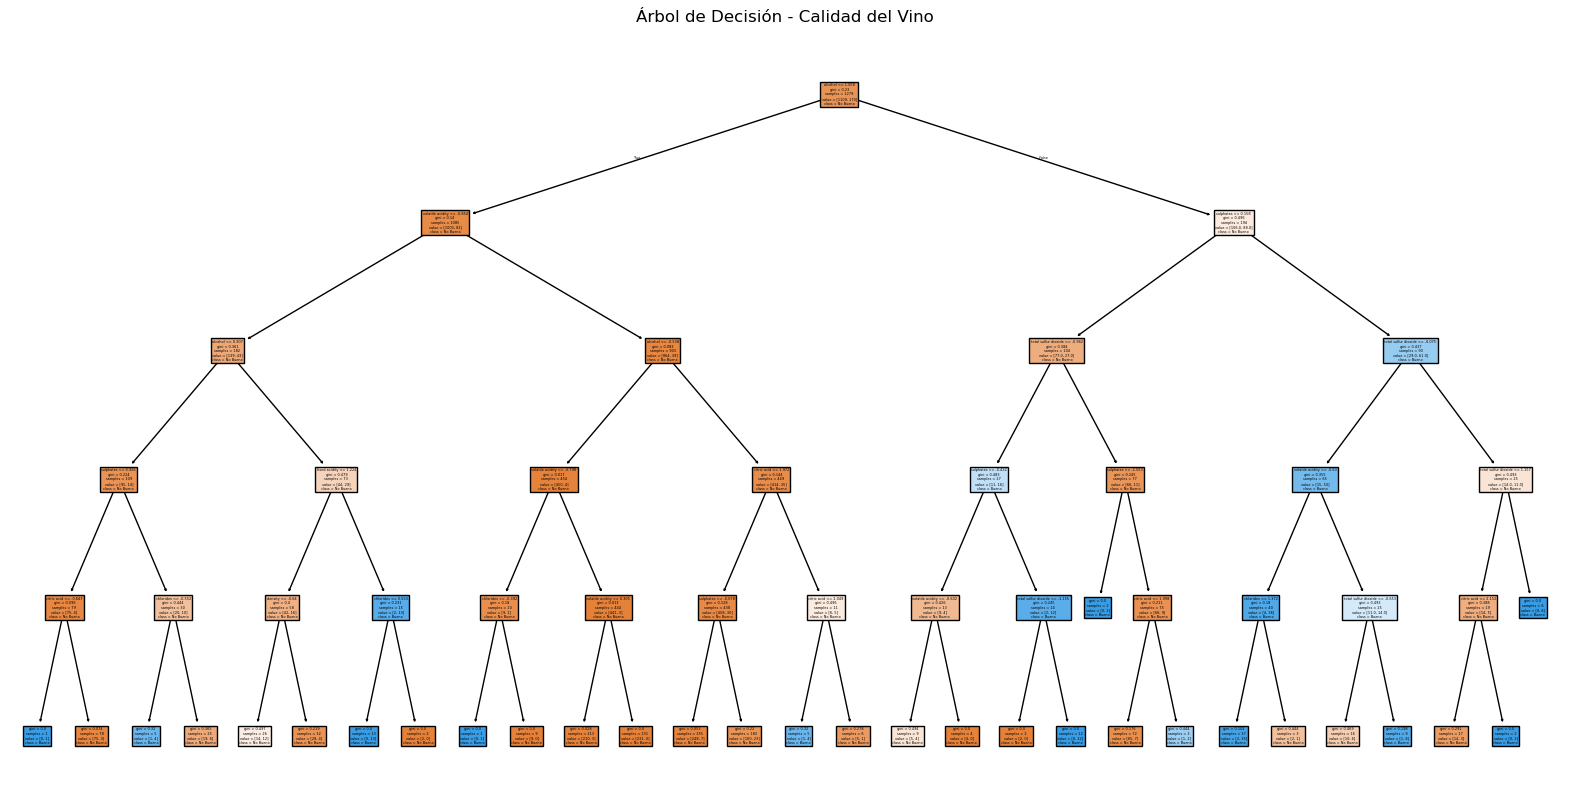

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Oranges')
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

importancias = modelo_arbol.feature_importances_
plt.figure(figsize=(8, 4))
sns.barplot(x=importancias, y=selected_features)
plt.title("Importancia de Características")
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(modelo_arbol, feature_names=selected_features, class_names=["No Bueno", "Bueno"], filled=True)
plt.title("Árbol de Decisión - Calidad del Vino")
plt.show()